We are given the following functions:
* $ f(x) = -e^x \quad\text{for}\, x \in [-5, 0] $
* $ g(x) = \cos(x) \quad\text{for}\, x \in [1, 6] $

We know that $f$ and $g$ are smooth functions.

Construct $ \eta(x) \,\text{for}\, x \in [-5, 6] $, such that

$
\eta(x) =
    \begin{cases}
        f(x)  & \quad \text{for} x \in [-5, 0]\\
        h(x)  & \quad \text{for} x \in (0, 1)\\
        g(x)  & \quad \text{for} x \in [1, 6]
    \end{cases}
$

and $ \eta(x) $ is a continuous funciton.

Can $ \eta(x) $ be a smooth function?

A function of class ${\displaystyle C^{k}}$ is a function of smoothness at least k; that is, a function of class ${\displaystyle C^{k}}$ is a function that has a $\text{k}^{th}$ derivative that is continuous in its domain. 

Generally, the term smooth function refers to a ${\displaystyle C^{\infty }}$ function.

We will use the Hermite interpolation polynomial with nodes 0, ..., 0, 1, ..., 1

In [87]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
import sys
sys.path.append('../util/')

from hermite_poly import hermite_poly

In [89]:
f = lambda x: -np.e ** x
g = lambda x: np.cos(x)

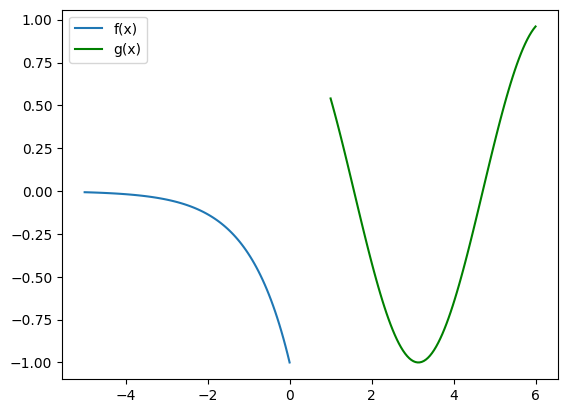

In [90]:
x_axis1 = np.linspace(-5, 0, 100)
x_axis3 = np.linspace(1, 6, 100)

plt.plot(x_axis1, f(x_axis1))
plt.plot(x_axis3, g(x_axis3), color='green')
plt.legend(['f(x)', 'g(x)'])
plt.show()

In [91]:
f_any_der = lambda x: -np.e ** x
g_4k_plus_0_der = lambda x: np.cos(x)
g_4k_plus_1_der = lambda x: -np.sin(x)
g_4k_plus_2_der = lambda x: -np.cos(x)
g_4k_plus_3_der = lambda x: np.sin(x)

In [92]:
def get_nodes_and_values(smoothness):
    nodes = np.array([
        0 if i < smoothness else 1 for i in range(2*smoothness)
    ])
    values = np.array([
        f_any_der(0) if i < smoothness 
        else
            g_4k_plus_0_der(1) if (i-smoothness) % 4 == 0
            else
            g_4k_plus_1_der(1) if (i-smoothness) % 4 == 1
            else
            g_4k_plus_2_der(1) if (i-smoothness) % 4 == 2
            else
            g_4k_plus_3_der(1)
        for i in range(2 * smoothness)
    ])
    return nodes, values

In [93]:
def show_graphs(smoothness):
    nodes, values = get_nodes_and_values(smoothness)

    x_axis1 = np.linspace(-5, 0, 100)
    x_axis2 = np.linspace(0, 1, 100)
    x_axis3 = np.linspace(1, 6, 100)

    plt.plot(x_axis1, f(x_axis1))
    plt.plot(x_axis2, hermite_poly(nodes, values, x_axis2))
    plt.plot(x_axis3, g(x_axis3))
    plt.legend(['f(x)', 'Hermite poly', 'g(x)'])
    plt.show()

    print('Nodes of interpolation: ', nodes)

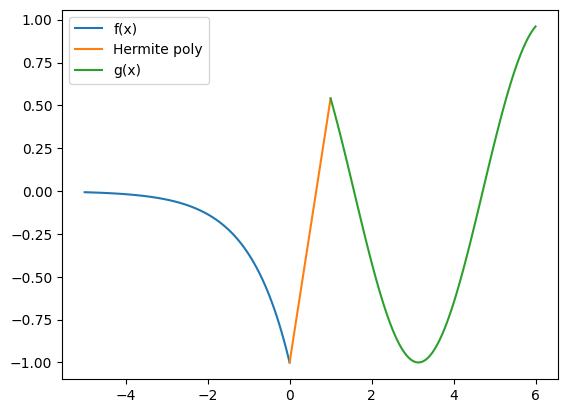

Nodes of interpolation:  [0 1]


In [94]:
show_graphs(1)

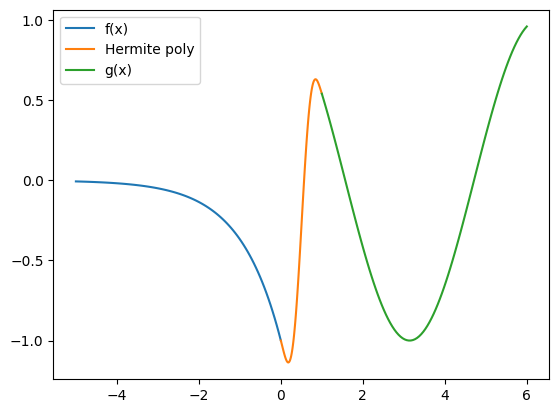

Nodes of interpolation:  [0 0 0 0 1 1 1 1]


In [95]:
show_graphs(4)

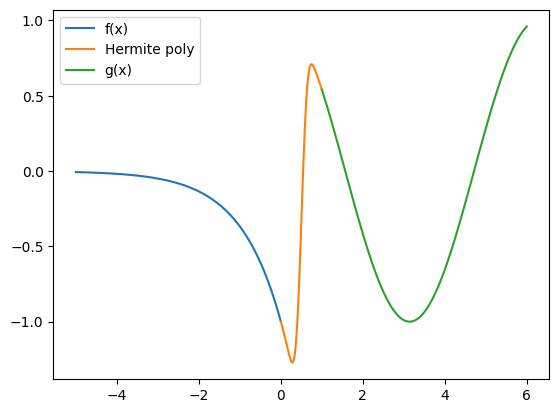

Nodes of interpolation:  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [96]:
show_graphs(10)

Now let's construct a proper smooth function $h(x)$.

Information about how it is constructed: https://www.youtube.com/watch?v=vD5g8aVscUI

In [97]:
psi = lambda x: np.e ** (-1/x) # if x == 0 return 0

phi = lambda x: psi(x) / (psi(x) + psi(1-x))

h = lambda x: (1 - phi(x)) * f(x) + phi(x) * g(x)

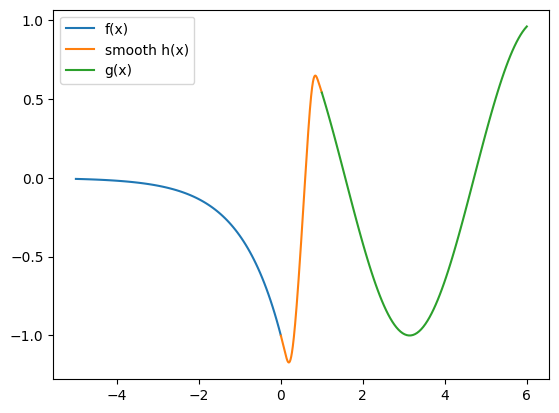

In [98]:
x_axis1 = np.linspace(-5, 0, 100)
x_axis2 = np.linspace(0.001, 0.999, 2000)
x_axis3 = np.linspace(1, 6, 100)

plt.plot(x_axis1, f(x_axis1))
plt.plot(x_axis2, h(x_axis2))
plt.plot(x_axis3, g(x_axis3))
plt.legend(['f(x)', 'smooth h(x)', 'g(x)'])
plt.show()